# Data Analysis Notebook

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Markdown
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [2]:


def theme1():
    plt.style.use('seaborn-v0_8-whitegrid')
    custom_params = {
        'figure.figsize': (15, 6),
        'font.size': 16,
        'font.weight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right':False,

    }
    plt.rcParams.update(custom_params)
    sns.set_palette(["#c7522a","#fbf2c4","#008585", "#003f5c", "#58508d", "#ffa600" , "#660e60","#6c584c"])
    
    
def theme2():
    plt.style.use('seaborn-v0_8-dark-palette')
    custom_params = {
        'figure.figsize': (15, 6),
        'font.size': 16,
        'font.weight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right':False,
    }
    plt.rcParams.update(custom_params)
    sns.set_palette(["#c7522a","#fbf2c4","#008585", "#003f5c", "#58508d", "#ffa600", "#660e60","#6c584c"])
theme1()



def doughnuts(data):
    # Create a pieplot
    plt.pie(x= data.values , labels=data.index , autopct='%.2f%%',shadow=True , startangle=90)
    plt.axis('equal')
    # plt.legend(loc='upper right')
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    return p



pd.set_option('display.max_columns', None)
    

In [3]:
df = pd.read_csv(r'/home/fever/work/Data sets/Airline/train.csv')

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


++++++++++++++++++++++++++++++++++++++++++++++
Arrival Delay in Minutes==>0.3 % | 
++++++++++++++++++++++++++++++++++++++++++++++


<Axes: >

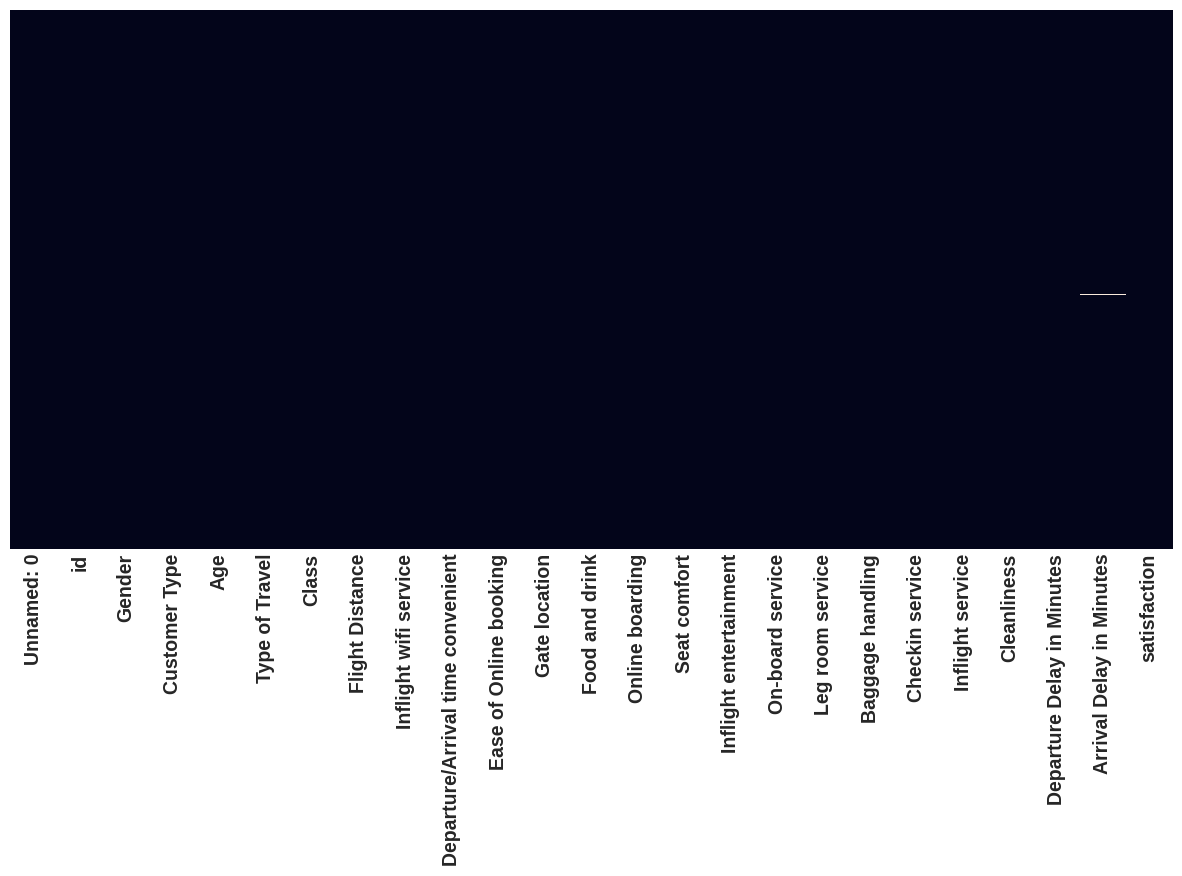

In [7]:

    
def null_percent(col):
    percentage = round(col.isna().sum()/len(col)*100,2)
    if percentage > 0:
        print(f'{col.name}==>{percentage} % |', end=' ')
print('+'*46)
df.apply(null_percent)
print()
print('+'*46)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)


    

## Univariate Analysis

## Numerical Features

> Unnamed: 0

In [8]:
df['Unnamed: 0'].describe()

count    103904.000000
mean      51951.500000
std       29994.645522
min           0.000000
25%       25975.750000
50%       51951.500000
75%       77927.250000
max      103903.000000
Name: Unnamed: 0, dtype: float64

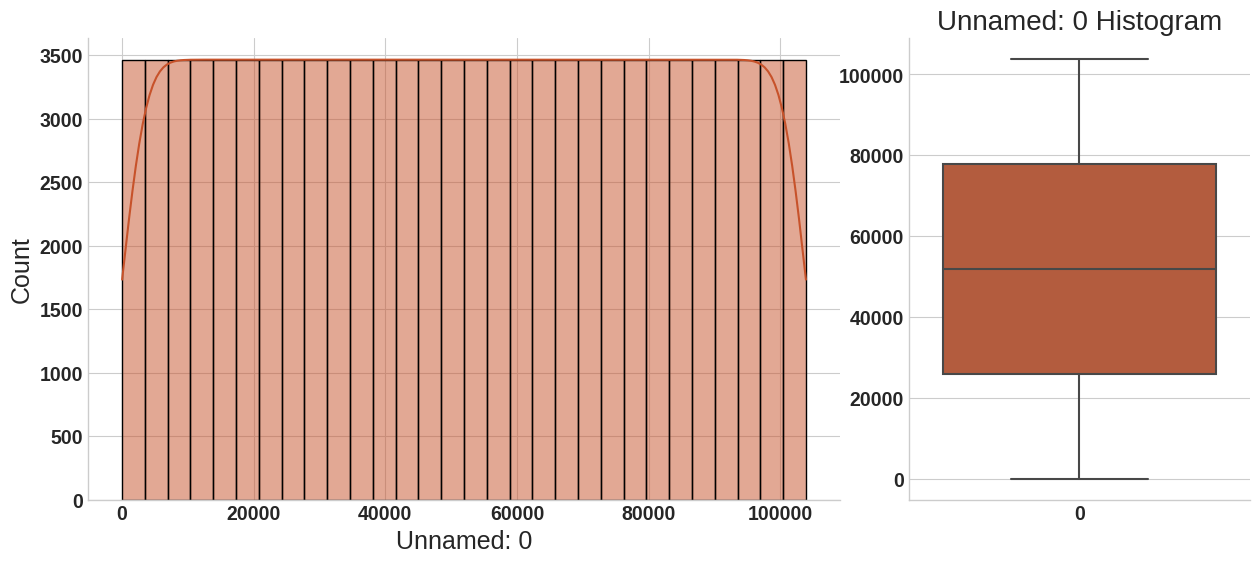

In [9]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Unnamed: 0', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Unnamed: 0'],ax=ax['box'])
plt.title('Unnamed: 0 Histogram')
plt.show()
        

> __id__


In [10]:
df['id'].describe()

count    103904.000000
mean      64924.210502
std       37463.812252
min           1.000000
25%       32533.750000
50%       64856.500000
75%       97368.250000
max      129880.000000
Name: id, dtype: float64

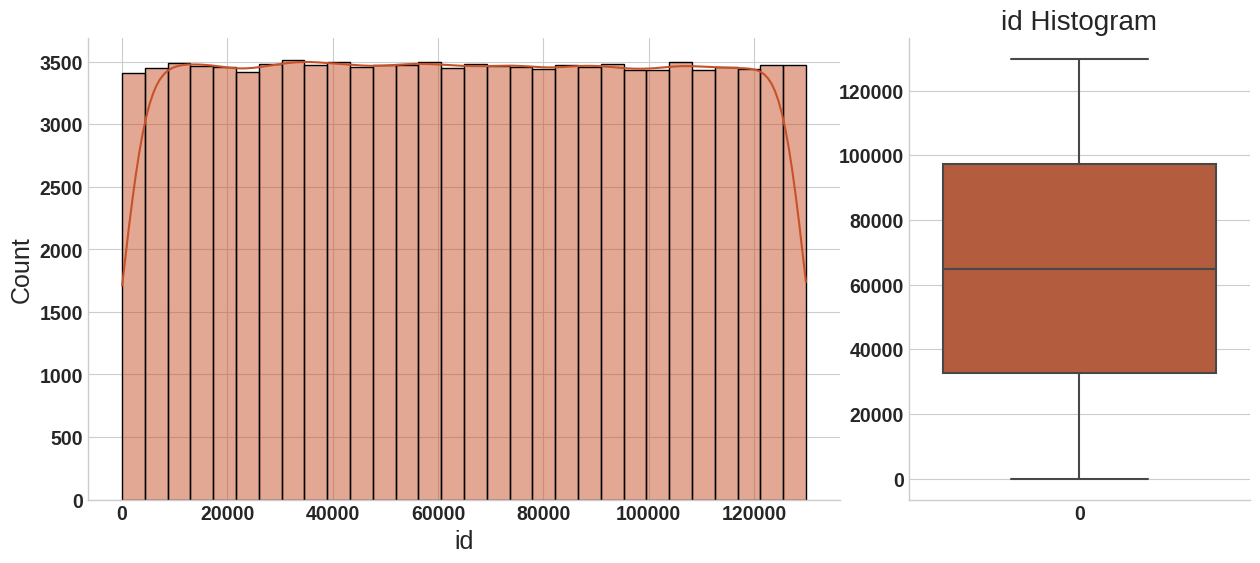

In [11]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='id', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['id'],ax=ax['box'])
plt.title('id Histogram')
plt.show()
        

> Age

In [12]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

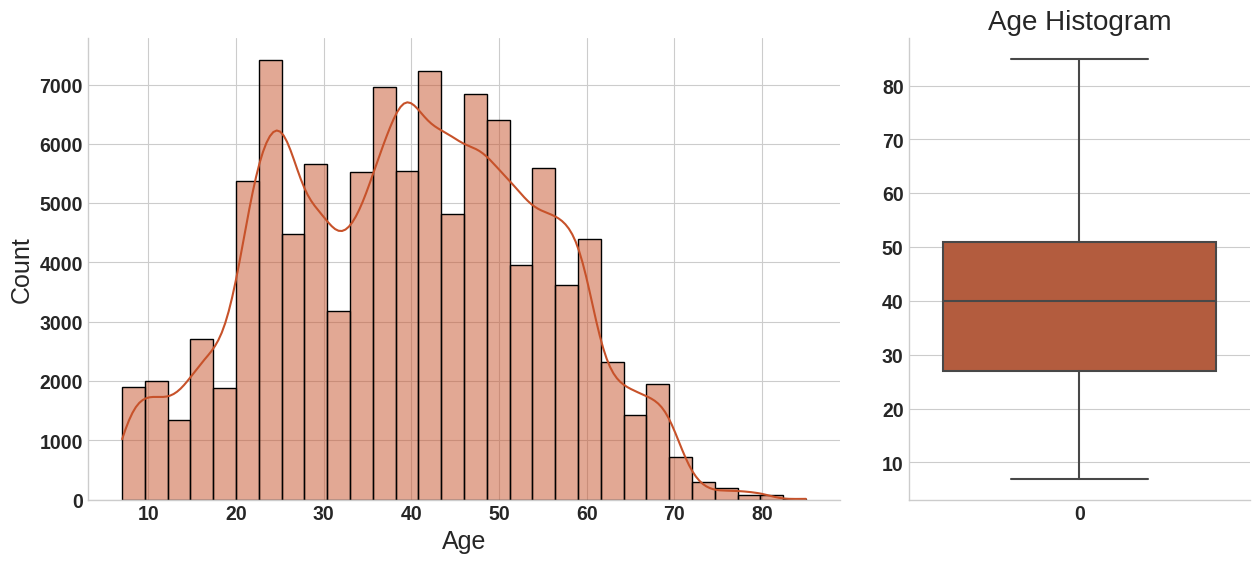

In [13]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Age', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Age'],ax=ax['box'])
plt.title('Age Histogram')
plt.show()
        

> Flight Distance

In [14]:
df['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

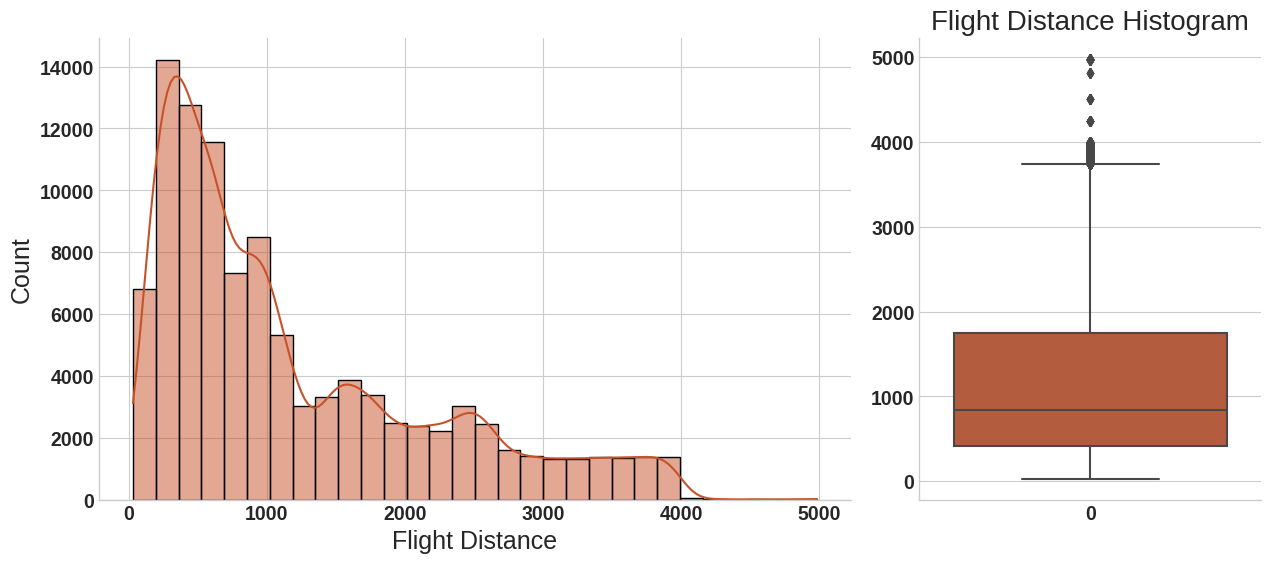

In [15]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Flight Distance', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Flight Distance'],ax=ax['box'])
plt.title('Flight Distance Histogram')
plt.show()
        

> Inflight wifi service

In [16]:
df['Inflight wifi service'].describe()

count    103904.000000
mean          2.729683
std           1.327829
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Inflight wifi service, dtype: float64

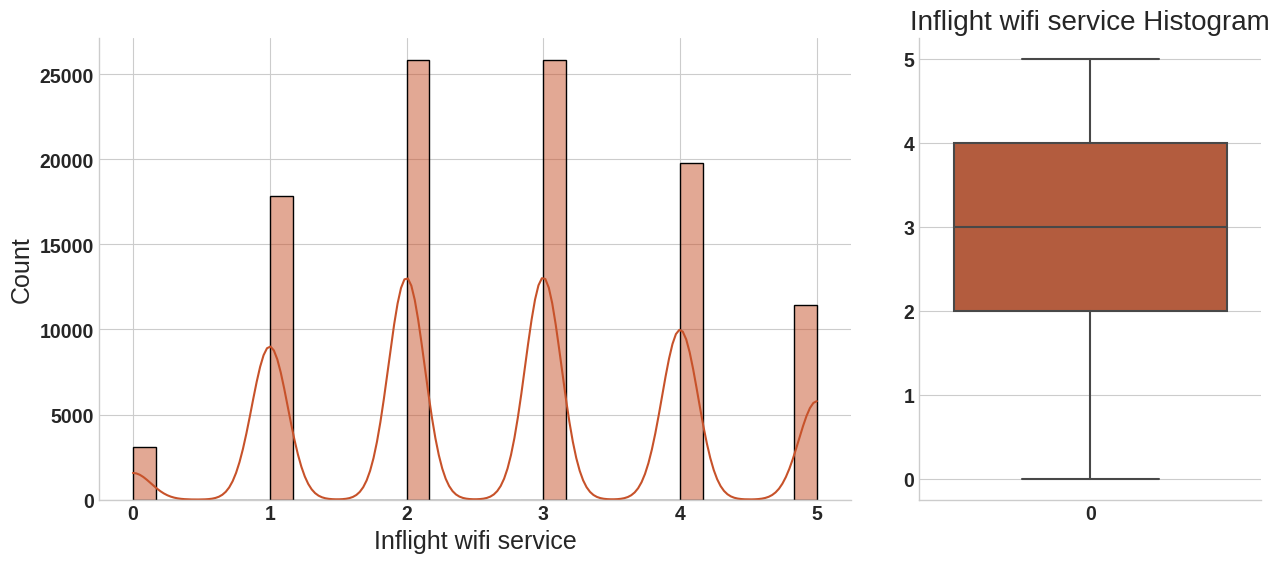

In [17]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Inflight wifi service', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Inflight wifi service'],ax=ax['box'])
plt.title('Inflight wifi service Histogram')
plt.show()
        

> Departure/Arrival time convenient

In [18]:
df['Departure/Arrival time convenient'].describe()

count    103904.000000
mean          3.060296
std           1.525075
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64

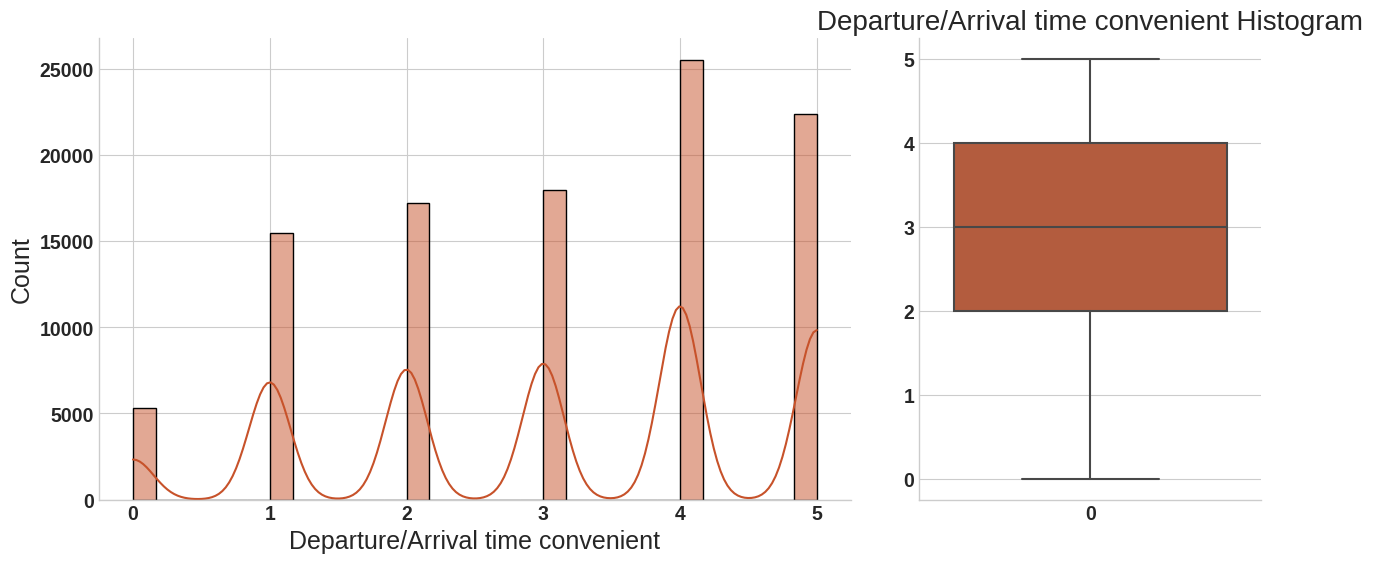

In [19]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Departure/Arrival time convenient', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Departure/Arrival time convenient'],ax=ax['box'])
plt.title('Departure/Arrival time convenient Histogram')
plt.show()
        

> Ease of Online booking

In [20]:
df['Ease of Online booking'].describe()

count    103904.000000
mean          2.756901
std           1.398929
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ease of Online booking, dtype: float64

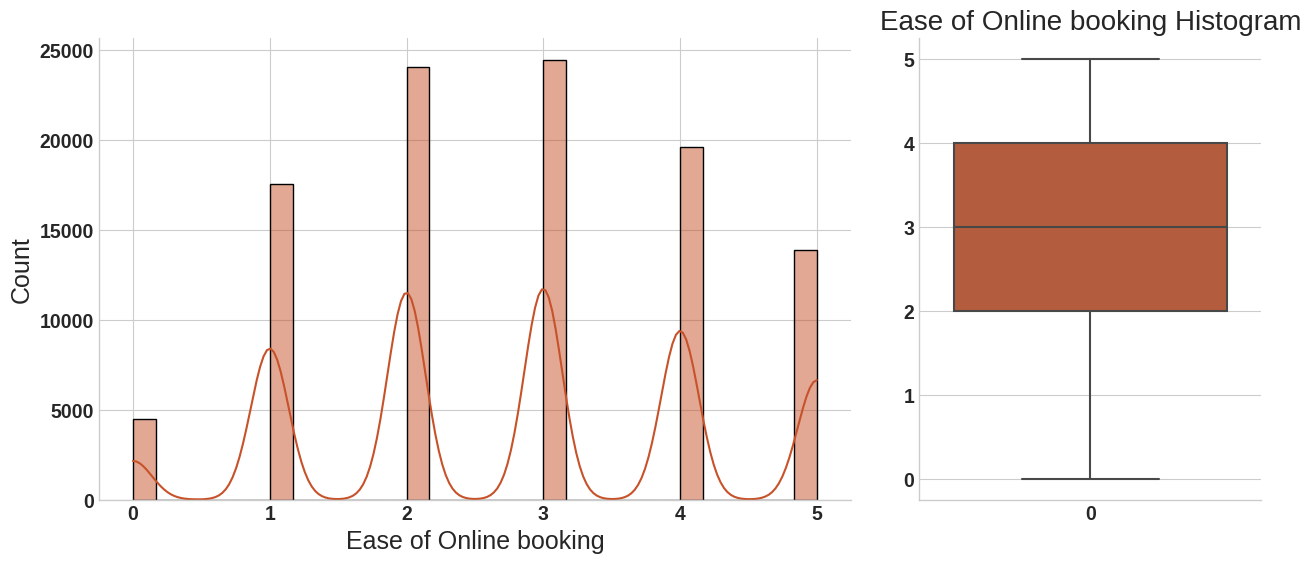

In [21]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Ease of Online booking', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Ease of Online booking'],ax=ax['box'])
plt.title('Ease of Online booking Histogram')
plt.show()
        

> Gate location

In [22]:
df['Gate location'].describe()

count    103904.000000
mean          2.976883
std           1.277621
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

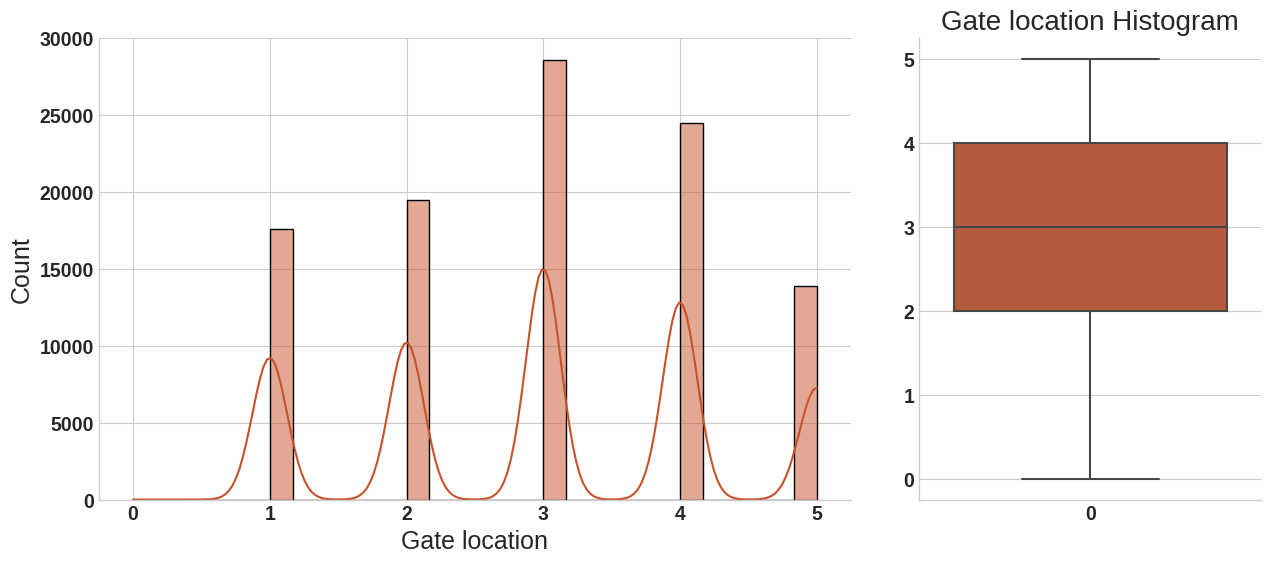

In [23]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Gate location', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Gate location'],ax=ax['box'])
plt.title('Gate location Histogram')
plt.show()
        

> Food and drink

In [24]:
df['Food and drink'].describe()

count    103904.000000
mean          3.202129
std           1.329533
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Food and drink, dtype: float64

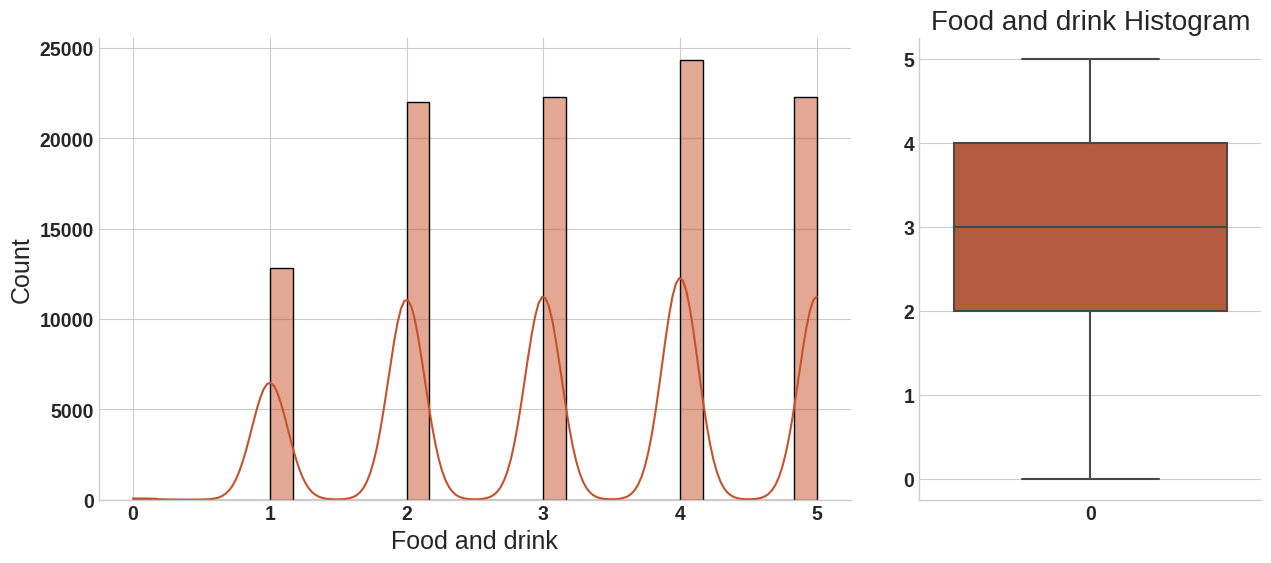

In [25]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Food and drink', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Food and drink'],ax=ax['box'])
plt.title('Food and drink Histogram')
plt.show()
        

> Online boarding

In [26]:
df['Online boarding'].describe()

count    103904.000000
mean          3.250375
std           1.349509
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Online boarding, dtype: float64

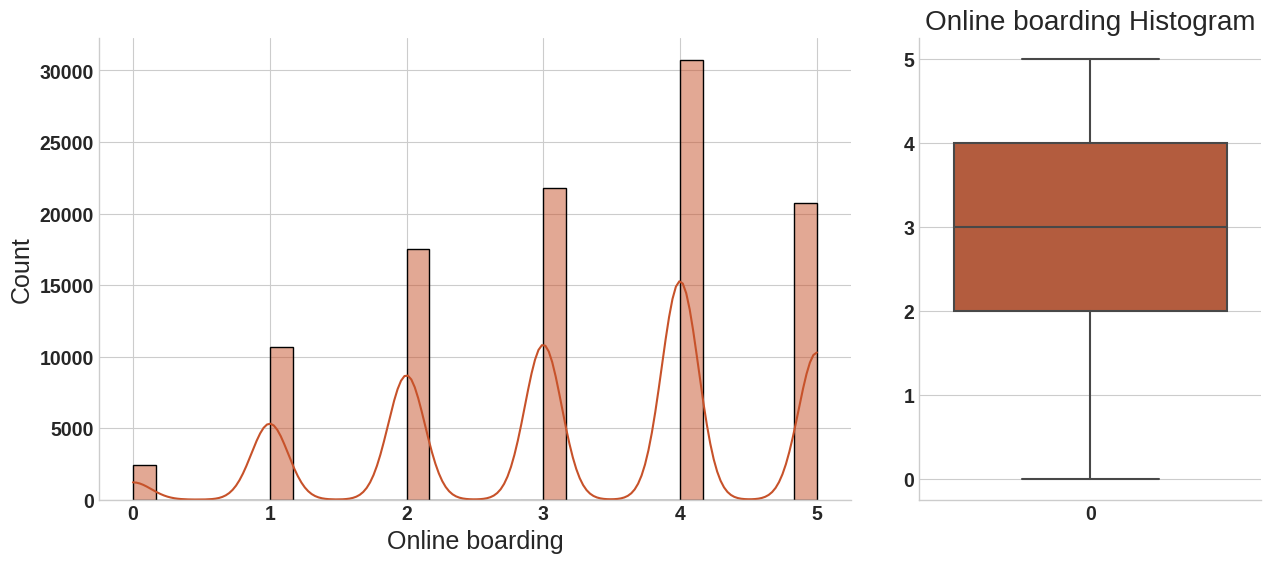

In [27]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Online boarding', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Online boarding'],ax=ax['box'])
plt.title('Online boarding Histogram')
plt.show()
        

> Seat comfort

In [28]:
df['Seat comfort'].describe()

count    103904.000000
mean          3.439396
std           1.319088
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Seat comfort, dtype: float64

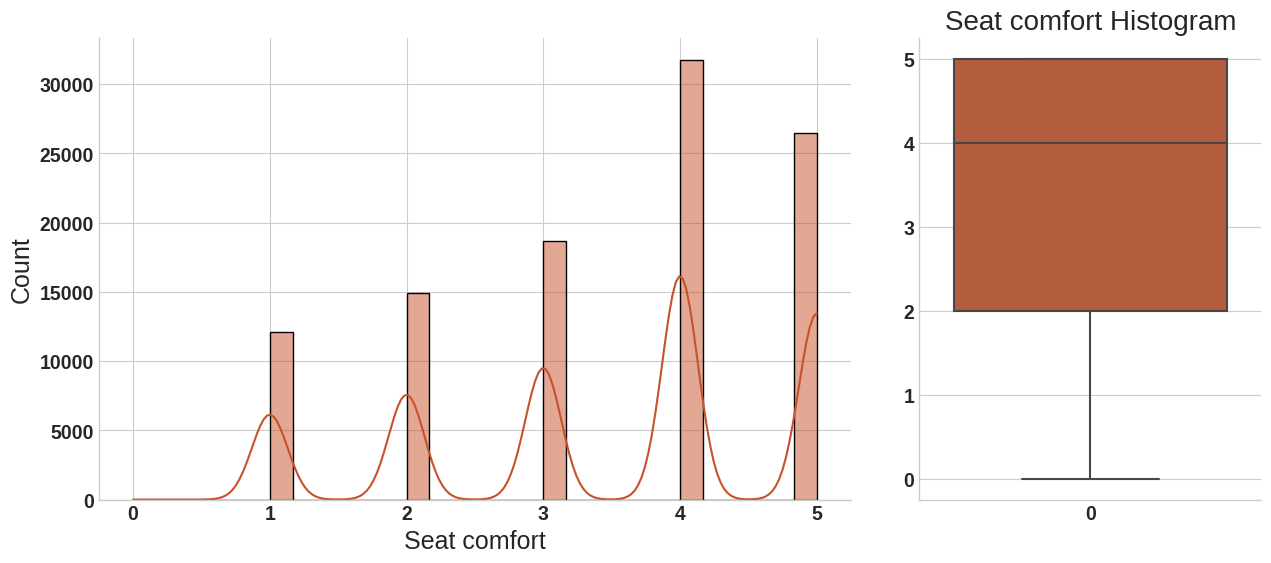

In [29]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Seat comfort', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Seat comfort'],ax=ax['box'])
plt.title('Seat comfort Histogram')
plt.show()
        

> Inflight entertainment

In [30]:
df['Inflight entertainment'].describe()

count    103904.000000
mean          3.358158
std           1.332991
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Inflight entertainment, dtype: float64

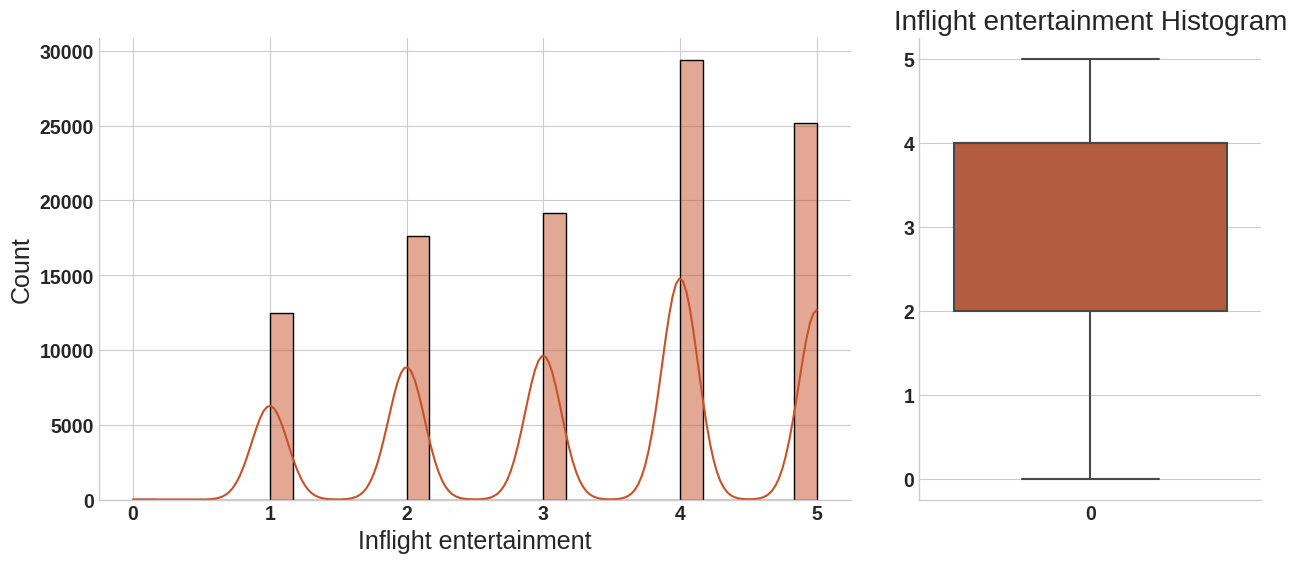

In [31]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Inflight entertainment', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Inflight entertainment'],ax=ax['box'])
plt.title('Inflight entertainment Histogram')
plt.show()
        

> On-board service

In [32]:
df['On-board service'].describe()

count    103904.000000
mean          3.382363
std           1.288354
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: On-board service, dtype: float64

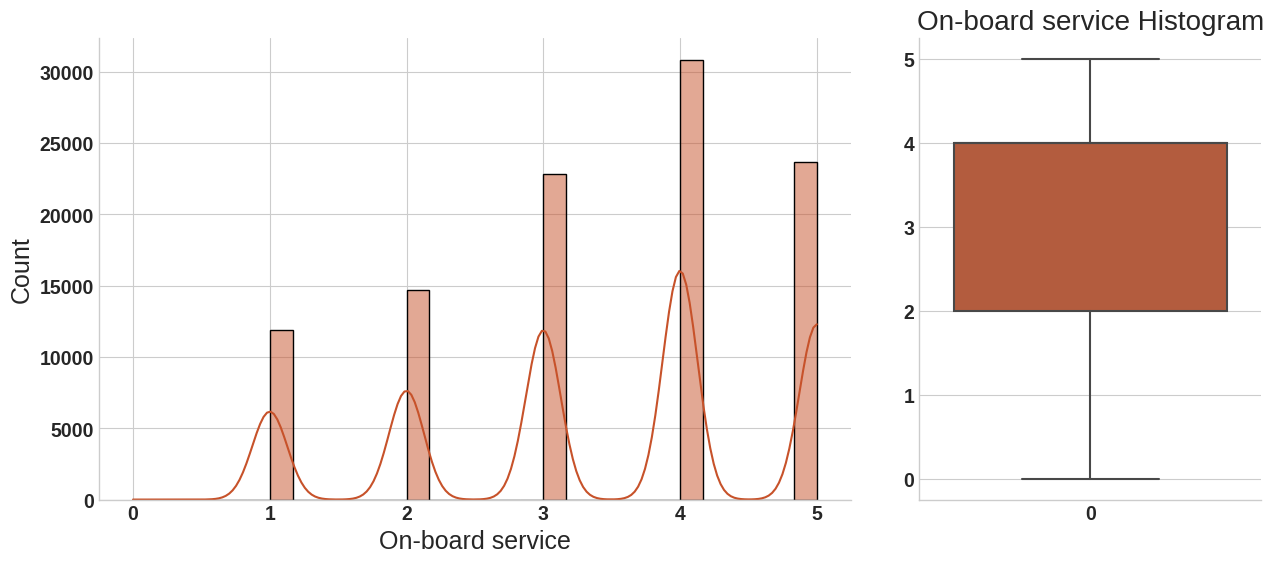

In [33]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='On-board service', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['On-board service'],ax=ax['box'])
plt.title('On-board service Histogram')
plt.show()
        

> Leg room service

In [34]:
df['Leg room service'].describe()

count    103904.000000
mean          3.351055
std           1.315605
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Leg room service, dtype: float64

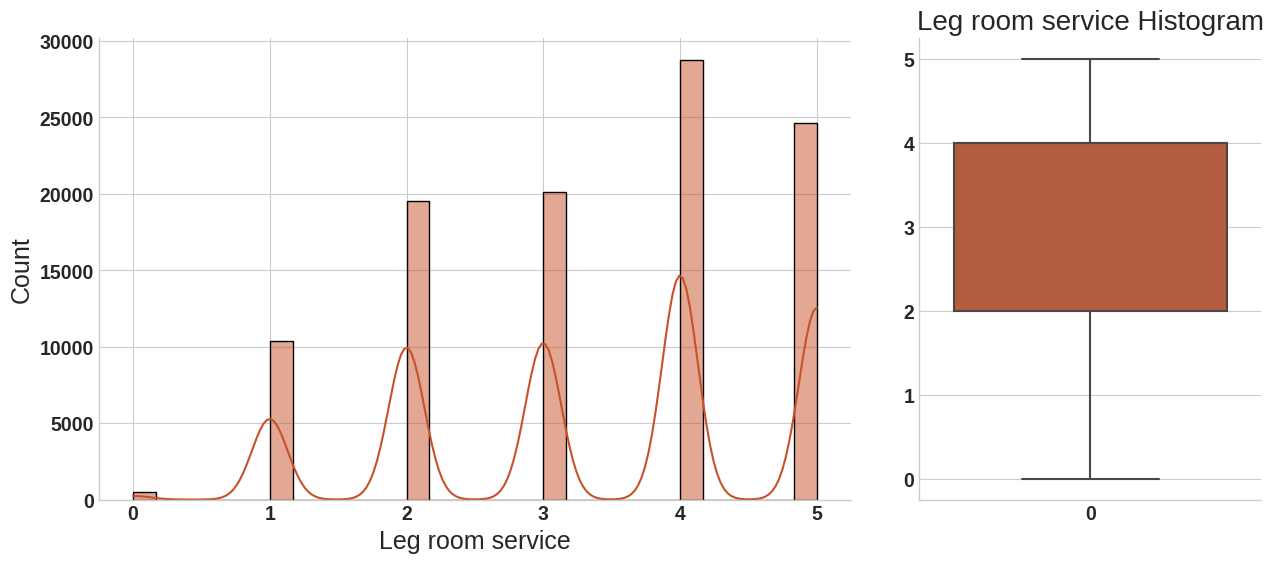

In [35]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Leg room service', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Leg room service'],ax=ax['box'])
plt.title('Leg room service Histogram')
plt.show()
        

> Baggage handling

In [36]:
df['Baggage handling'].describe()

count    103904.000000
mean          3.631833
std           1.180903
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Baggage handling, dtype: float64

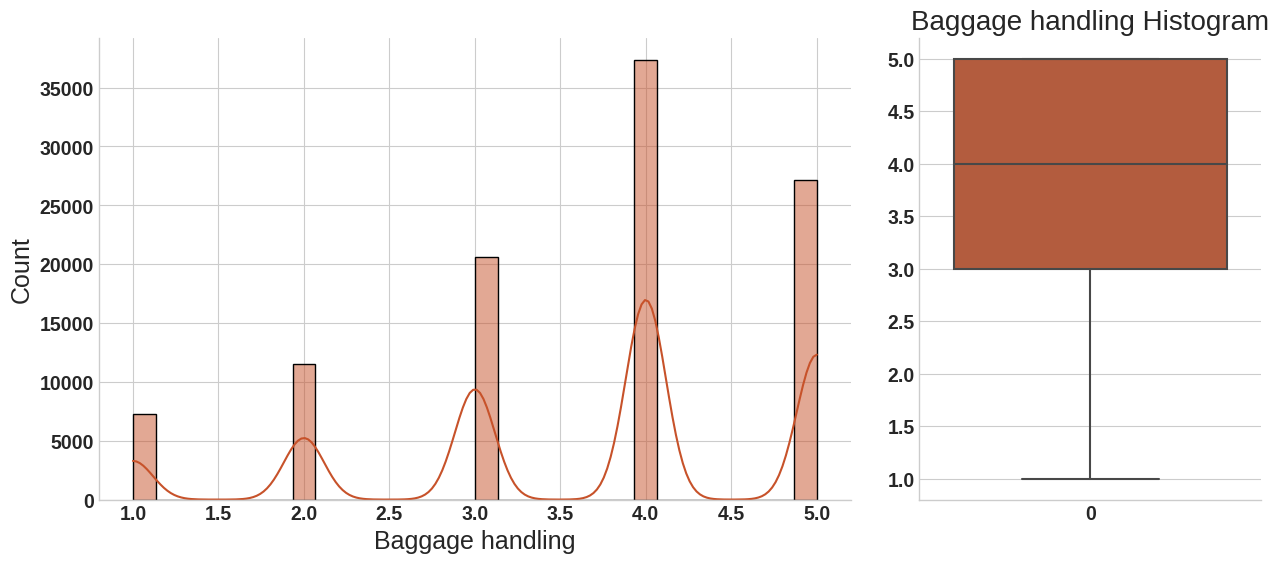

In [37]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Baggage handling', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Baggage handling'],ax=ax['box'])
plt.title('Baggage handling Histogram')
plt.show()
        

> Checkin service

In [38]:
df['Checkin service'].describe()

count    103904.000000
mean          3.304290
std           1.265396
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Checkin service, dtype: float64

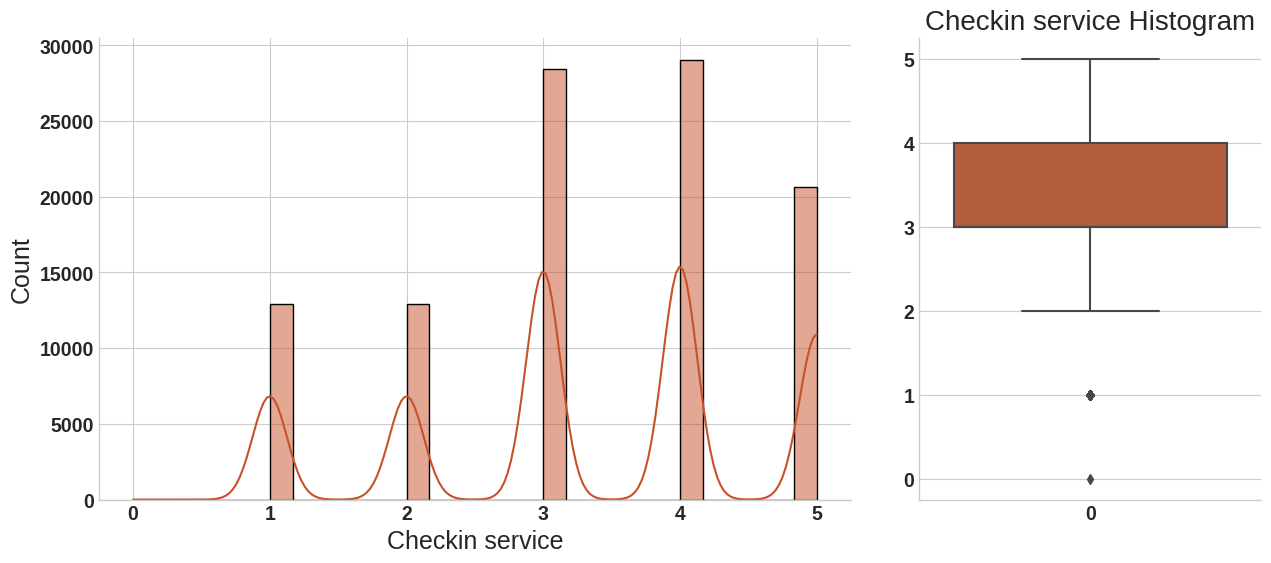

In [39]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Checkin service', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Checkin service'],ax=ax['box'])
plt.title('Checkin service Histogram')
plt.show()
        

> Inflight service

In [40]:
df['Inflight service'].describe()

count    103904.000000
mean          3.640428
std           1.175663
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Inflight service, dtype: float64

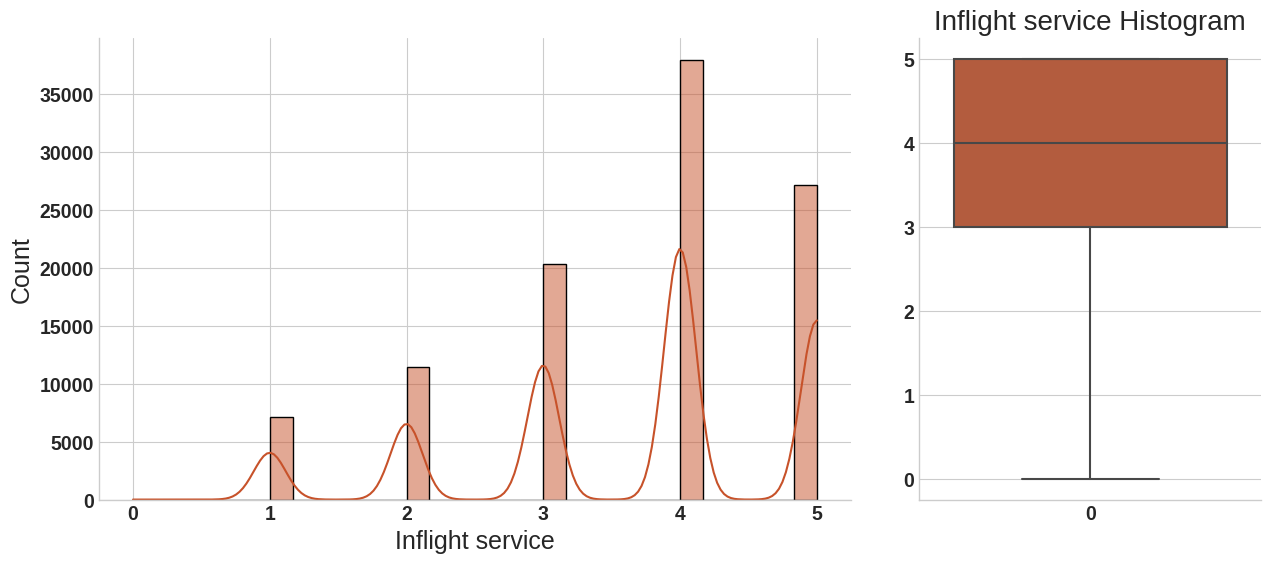

In [41]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Inflight service', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Inflight service'],ax=ax['box'])
plt.title('Inflight service Histogram')
plt.show()
        

> Cleanliness

In [42]:
df['Cleanliness'].describe()

count    103904.000000
mean          3.286351
std           1.312273
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Cleanliness, dtype: float64

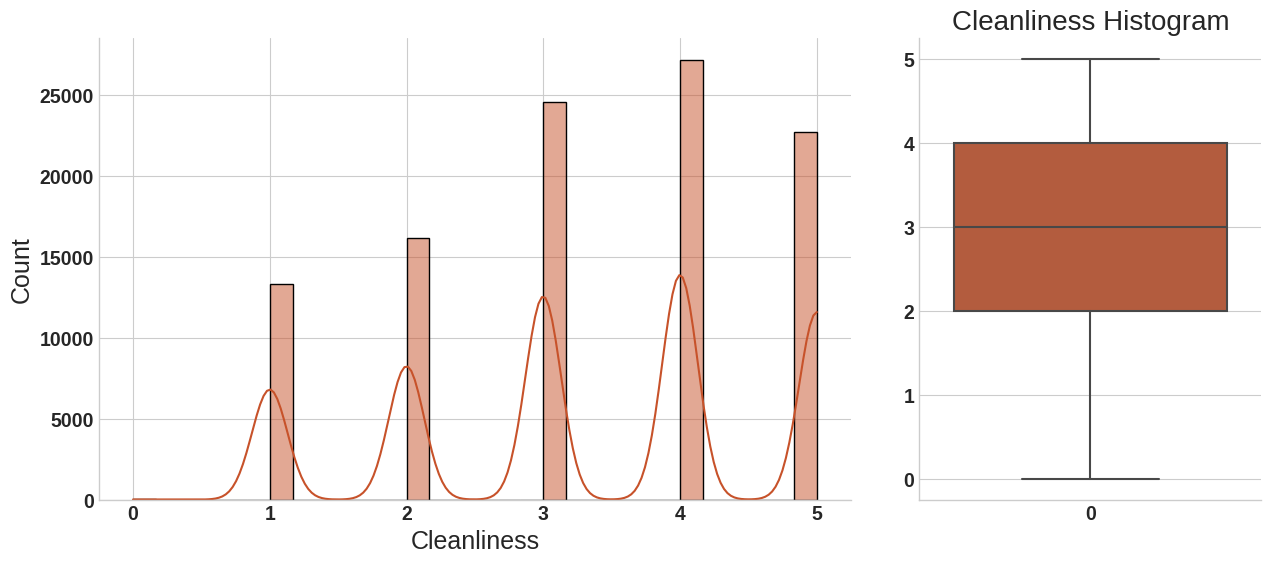

In [43]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Cleanliness', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Cleanliness'],ax=ax['box'])
plt.title('Cleanliness Histogram')
plt.show()
        

> Departure Delay in Minutes

In [44]:
df['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

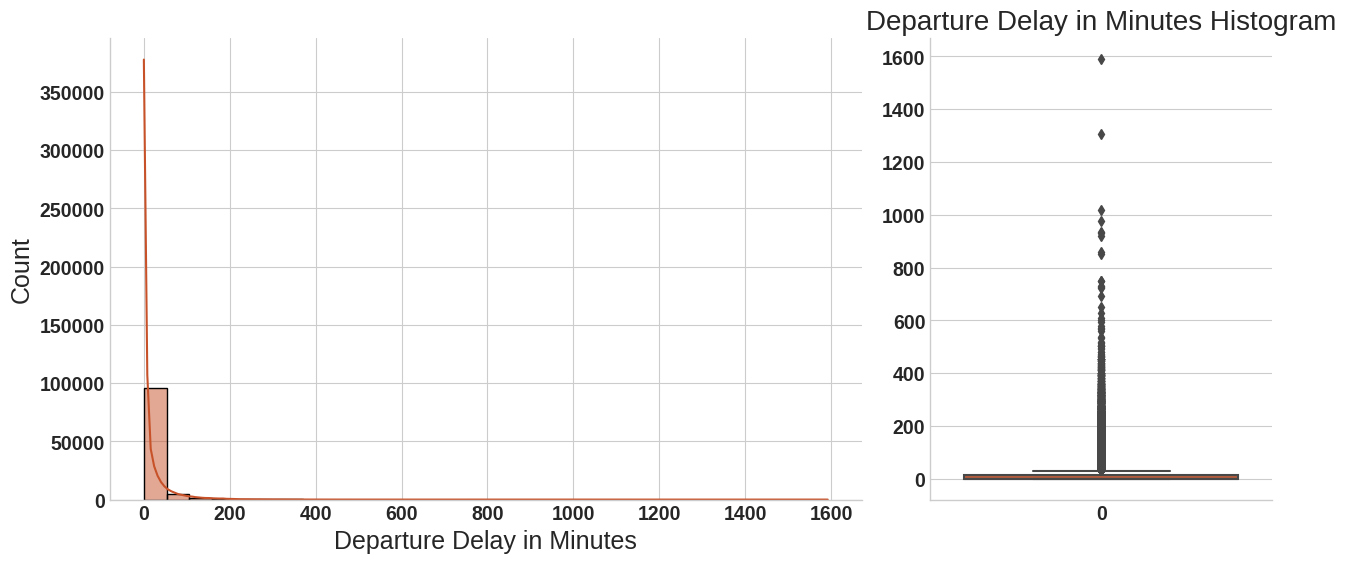

In [45]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Departure Delay in Minutes', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Departure Delay in Minutes'],ax=ax['box'])
plt.title('Departure Delay in Minutes Histogram')
plt.show()
        

> Arrival Delay in Minutes

In [46]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

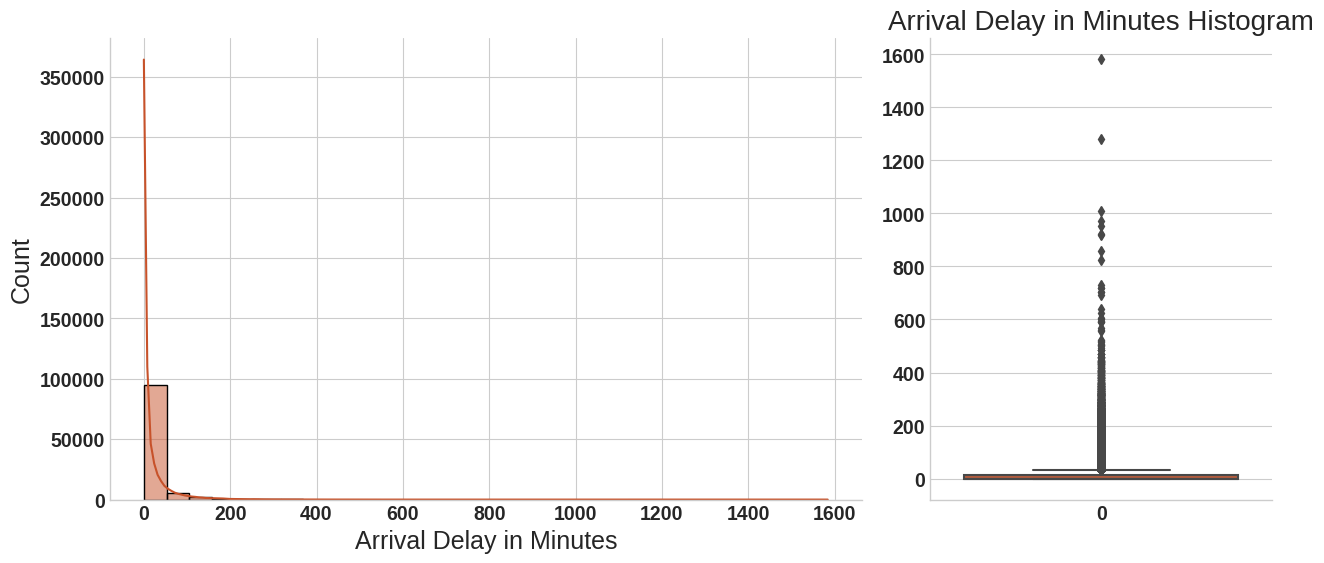

In [47]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Arrival Delay in Minutes', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Arrival Delay in Minutes'],ax=ax['box'])
plt.title('Arrival Delay in Minutes Histogram')
plt.show()
        

## Categorical Features

> Gender

In [48]:
df['Gender'].describe()

count     103904
unique         2
top       Female
freq       52727
Name: Gender, dtype: object

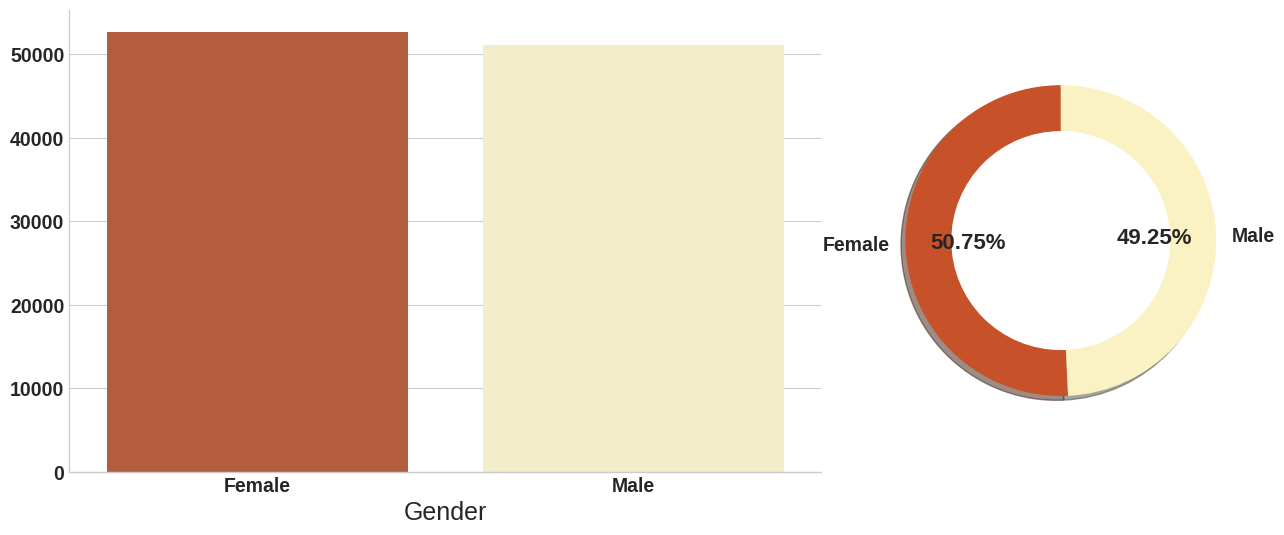

In [49]:
fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['Gender'].value_counts()
sns.barplot(x=g.index , y=g.values, ax=ax['hist'])
ax['doughnut']=doughnuts(g)
plt.show()

> Customer Type

In [50]:
df['Customer Type'].describe()

count             103904
unique                 2
top       Loyal Customer
freq               84923
Name: Customer Type, dtype: object

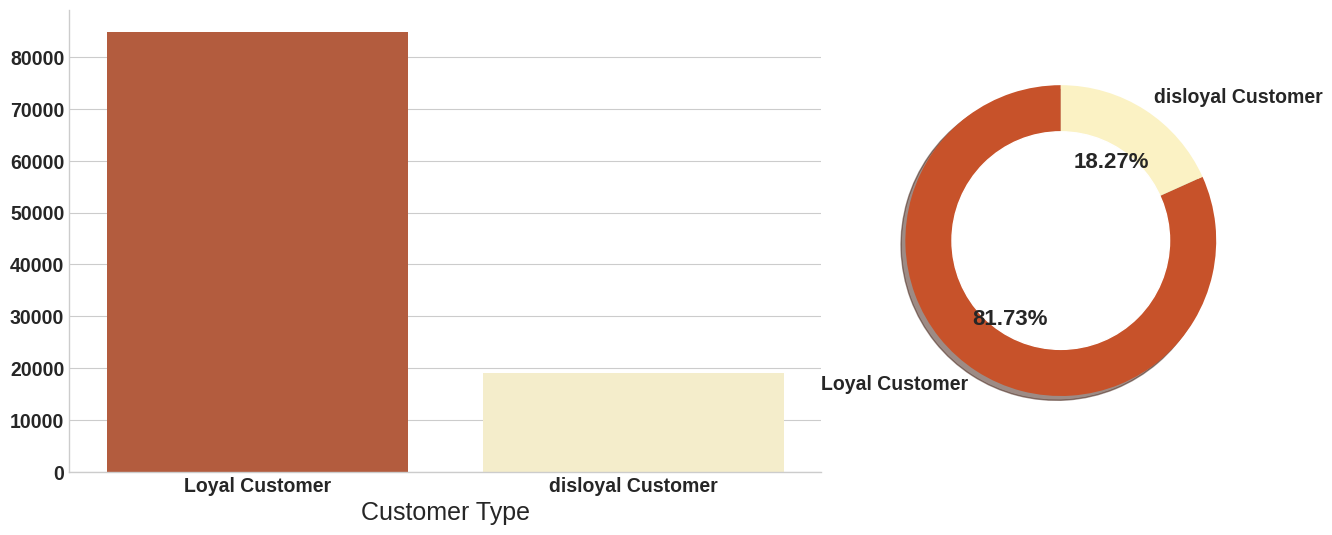

In [51]:

fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['Customer Type'].value_counts()
sns.barplot(x=g.index , y=g.values, ax=ax['hist'])
ax['doughnut']=doughnuts(g)
plt.show()

        

> Type of Travel

In [52]:
df['Type of Travel'].describe()

count              103904
unique                  2
top       Business travel
freq                71655
Name: Type of Travel, dtype: object

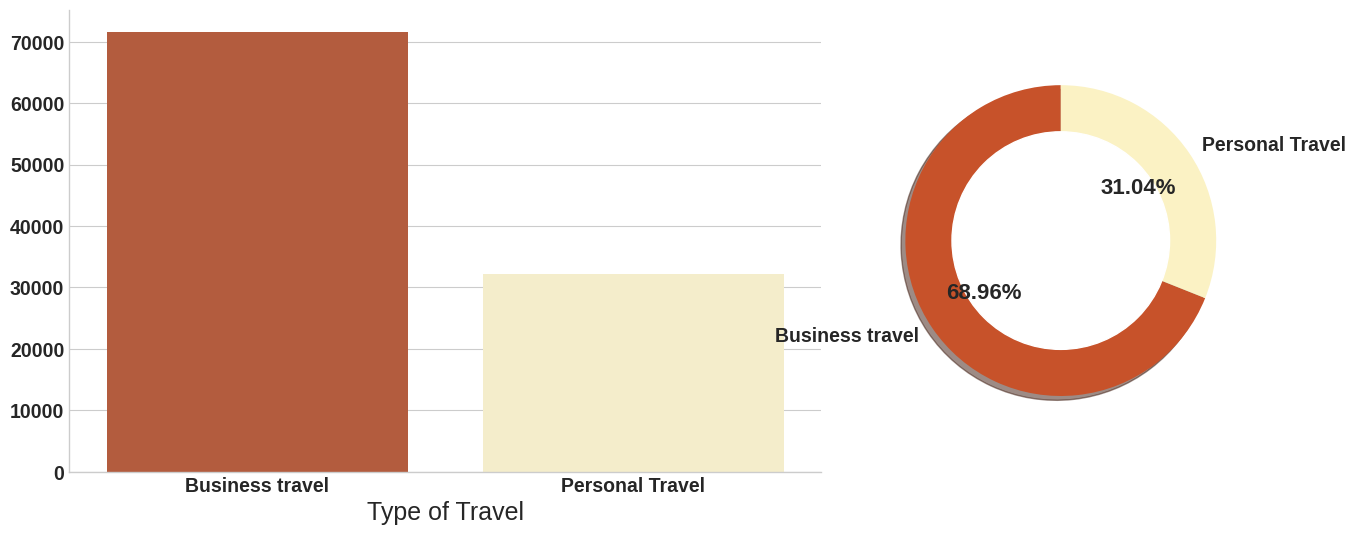

In [53]:

fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['Type of Travel'].value_counts()
sns.barplot(x=g.index , y=g.values, ax=ax['hist'])
ax['doughnut']=doughnuts(g)
plt.show()

        

> Class

In [54]:
df['Class'].describe()

count       103904
unique           3
top       Business
freq         49665
Name: Class, dtype: object

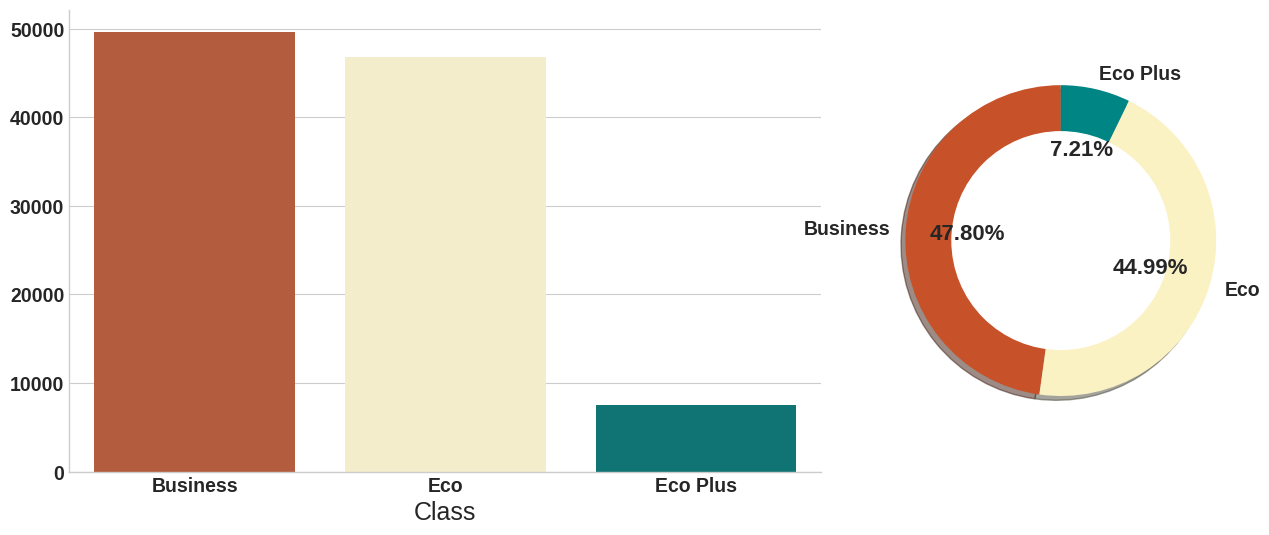

In [55]:

fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['Class'].value_counts()
sns.barplot(x=g.index , y=g.values, ax=ax['hist'])
ax['doughnut']=doughnuts(g)
plt.show()

        

> satisfaction

In [56]:
df['satisfaction'].describe()

count                      103904
unique                          2
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

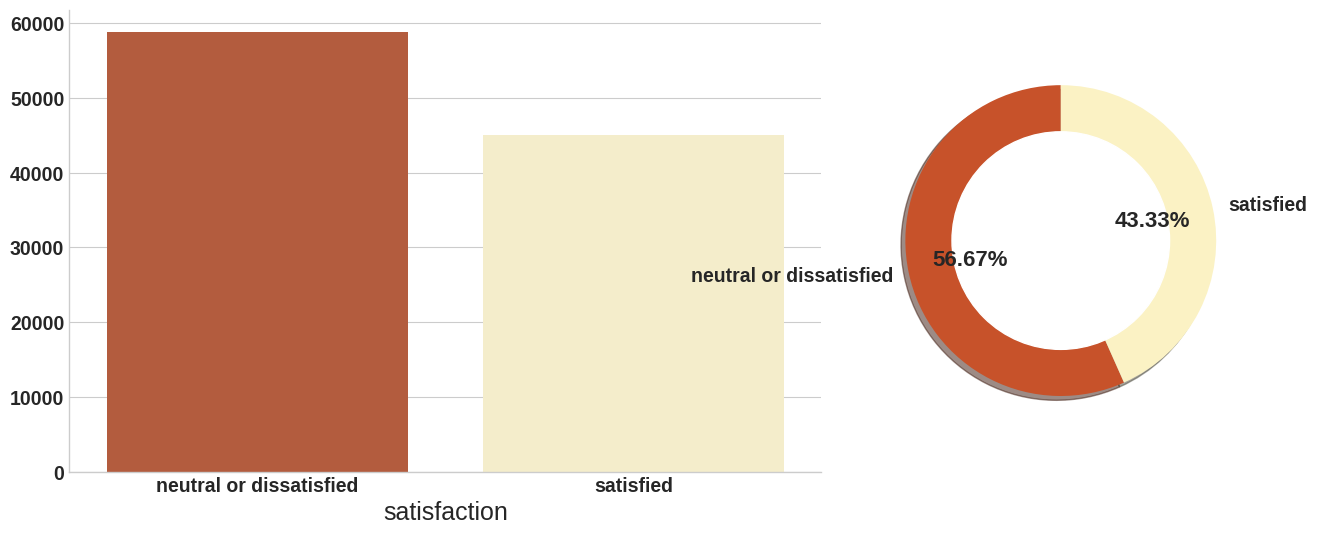

In [57]:

fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['satisfaction'].value_counts()
sns.barplot(x=g.index , y=g.values, ax=ax['hist'])
ax['doughnut']=doughnuts(g)
plt.show()

        

# __Feature Enginerring__

### __Remove Usless Columns__

In [58]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

### __Remove Null Values__

In [59]:
df['Arrival Delay in Minutes'].dropna(inplace=True)

### __Deal With Outliers__

In [60]:

def get_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    max_val = col[(col >= lower_bound) & (col <= upper_bound)].max()
    col[(col < lower_bound) | (col > upper_bound)] = max_val
    return col

columns_to_process = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[columns_to_process] = df[columns_to_process].apply(get_outliers, axis=0)



### __Feature Encoding__

- __Ordinal Columns__

In [61]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [62]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})

In [63]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [64]:
df['satisfaction'] = df['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})

- __Nominal Columns__

In [65]:
import category_encoders as ce

In [69]:


binary_encoder = ce.BinaryEncoder(cols=['Gender','Type of Travel','Class'])
df = binary_encoder.fit_transform(df)


In [70]:
df.head()

,Gender_0,Gender_1,Customer Type,Age,Type of Travel_0,Type of Travel_1,Class_0,Class_1,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,1,13,0,1,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,1,0,25,1,0,1,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,0,1,26,1,0,1,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,0,1,25,1,0,1,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,1,61,1,0,1,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [71]:
df.describe()

,Gender_0,Gender_1,Customer Type,Age,Type of Travel_0,Type of Travel_1,Class_0,Class_1,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,0.507459,0.492541,0.817322,39.379706,0.689627,0.310373,0.927876,0.522011,1186.122902,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,7.396299,7.865813,0.433333
std,0.499947,0.499947,0.386404,15.114964,0.462649,0.462649,0.258695,0.499518,988.098272,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,11.223866,11.837881,0.495538
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,3736.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000,1.000000


In [72]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Flight Distance']])
df[['Age', 'Flight Distance']] = scaled_features


In [83]:
df.isna().sum()

Gender_0                               0
Gender_1                               0
Customer Type                          0
Age                                    0
Type of Travel_0                       0
Type of Travel_1                       0
Class_0                                0
Class_1                                0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in

In [85]:
df.dropna(inplace=True)

In [116]:
df['Random1'] = np.random.rand(len(df))
df['Random2'] = np.random.rand(len(df))
df['Random3'] = np.random.rand(len(df))
df['Random4'] = np.random.rand(len(df))

In [117]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [118]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model on the training data
model.fit(X, y)

# Get the feature importance (coefficients) after fitting
feature_importance = np.abs(model.coef_[0])


In [154]:

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

def highlight_max(s):
    return ['background-color: red' if 'Random' in val else '' for val in s]

styled_feature_importance_df = feature_importance_df.style.apply(highlight_max, subset=['Feature'])

styled_feature_importance_df

,Feature,Importance
5,Type of Travel_1,5.341412
0,Gender_0,2.834463
1,Gender_1,2.790694
4,Type of Travel_0,2.596364
2,Customer Type,2.056110
7,Class_1,0.749038
14,Online boarding,0.610392
9,Inflight wifi service,0.393855
20,Checkin service,0.321809
17,On-board service,0.300388


In [160]:
threshold = feature_importance_df[feature_importance_df['Feature'].str.startswith('Random')]['Importance'].max()


In [166]:
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

In [167]:
important_features

['Type of Travel_1',
 'Gender_0',
 'Gender_1',
 'Type of Travel_0',
 'Customer Type',
 'Class_1',
 'Online boarding',
 'Inflight wifi service',
 'Checkin service',
 'On-board service',
 'Leg room service',
 'Cleanliness',
 'Ease of Online booking',
 'Baggage handling',
 'Age',
 'Departure/Arrival time convenient',
 'Inflight service',
 'Class_0',
 'Inflight entertainment',
 'Seat comfort']

In [168]:
new_df = df[important_features]

In [177]:
new_df

,Type of Travel_1,Gender_0,Gender_1,Type of Travel_0,Customer Type,Class_1,Online boarding,Inflight wifi service,Checkin service,On-board service,Leg room service,Cleanliness,Ease of Online booking,Baggage handling,Age,Departure/Arrival time convenient,Inflight service,Class_0,Inflight entertainment,Seat comfort
0,1,0,1,0,1,1,3,3,4,4,3,5,3,4,-1.745279,4,5,0,5,5
1,0,0,1,1,0,0,3,3,1,1,5,1,3,3,-0.951360,2,4,1,1,1
2,0,1,0,1,1,0,5,2,4,4,3,5,2,4,-0.885200,2,4,1,5,5
3,0,1,0,1,1,0,2,2,1,2,5,2,5,3,-0.951360,5,4,1,2,2
4,0,0,1,1,1,0,5,3,3,3,4,3,3,4,1.430397,3,3,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,1,2,2,2,3,1,2,2,4,-1.083680,1,3,1,2,2
103900,0,0,1,1,1,0,4,4,5,5,5,4,4,5,0.636478,4,5,1,5,5
103901,0,0,1,1,0,0,1,1,5,3,2,4,1,4,-0.620561,1,5,1,4,5
103902,0,1,0,1,0,1,1,1,5,4,5,1,1,1,-1.149840,1,4,1,1,1


# __Model__

In [178]:
X = new_df
y = df['satisfaction']

In [184]:
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [186]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

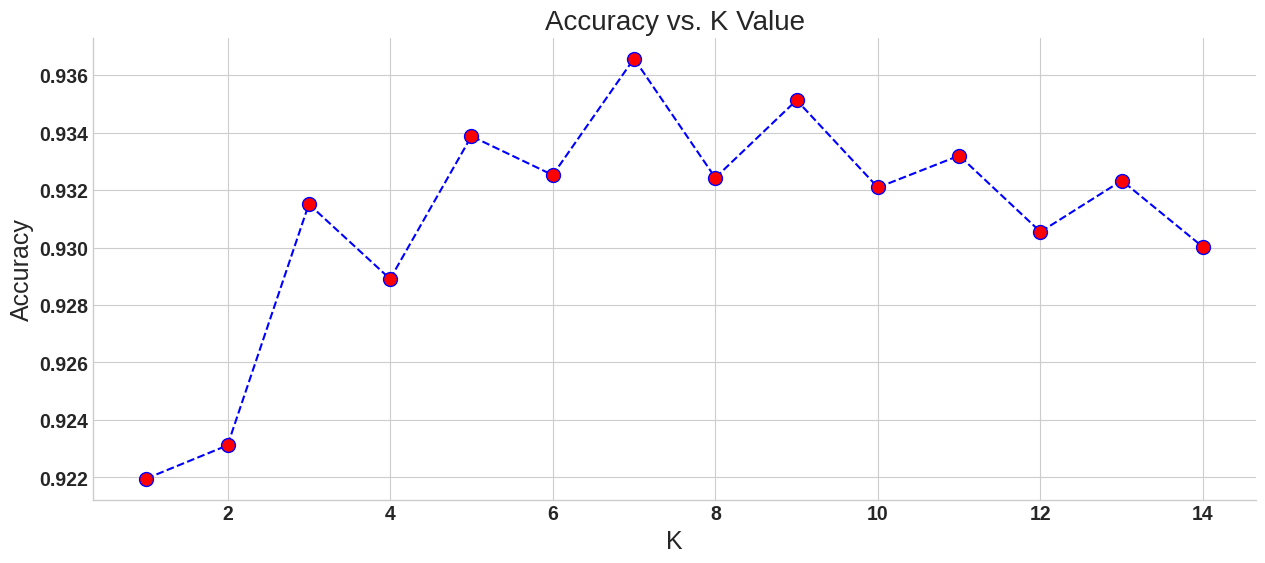

In [187]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [188]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [189]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 93.66%


In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.94     11655
           1       0.95      0.90      0.93      9064

    accuracy                           0.94     20719
   macro avg       0.94      0.93      0.94     20719
weighted avg       0.94      0.94      0.94     20719

